<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Module 2: Example of a classifier based on decision trees

In this notebook, we will use the `DecisionTreeClassifier` implemented in `scikit-learn` to classify the instances in the Iris flower dataset.

Let's import the required classes:

In [1]:
# Import packages
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [2]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [3]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [4]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', ytrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100,)
xtest shape:  (50, 4)
ytest shape:  (50,)


We will now create the classifier. In thos notebook, we will use the `DecisionTreeClassifier` de sklearn.

There are a wide variety of parameters we can tune to try to improve its behaviour. Some of the most importants are:

```
criterion: {“gini”, “entropy”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

splitter: {“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth: int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: int or float, default=2
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

Changed in version 0.18: Added float values for fractions.

min_samples_leaf: int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.

If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Changed in version 0.18: Added float values for fractions.

min_weight_fraction_leaf: float, default=0.0
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.

If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

If “auto”, then max_features=sqrt(n_features).

If “sqrt”, then max_features=sqrt(n_features).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.

Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
```



For this example, we will keep the default values.

In [5]:
# Init the Classifier
model = DecisionTreeClassifier()

We can now train the model:

In [6]:
# Train the model 
model.fit(xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


And once trained, predict the labels for the test set:

In [7]:
# Predict Output 
preds = model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives

Text(110.44999999999997, 0.5, 'Predicted')

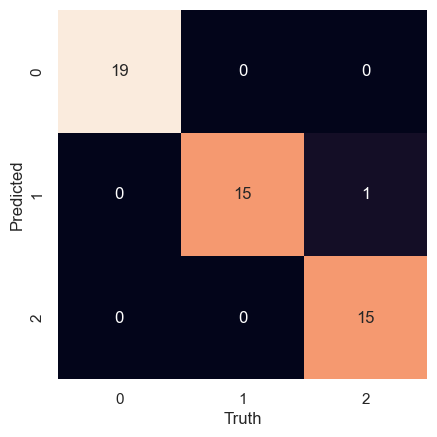

In [8]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

We can also compute the most common classification metrics with the help of sklearn.metrics.classification_report. These metrics include the precission, recall, f1-score and support of each class. For more information regarding these metrics, you can refer to the theoretical slides or access the documentation.

In [9]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In addition to the confusion matrix and the classification report, we can also visualize the tree itself:

In [10]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  3.90
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- feature_1 <= 2.25
|   |   |   |   |   |--- feature_2 <= 4.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  4.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  2.25
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



We can also visualize it graphically, but please bear in mind that the lines buildinig the tree are missing due to a bug in the function.

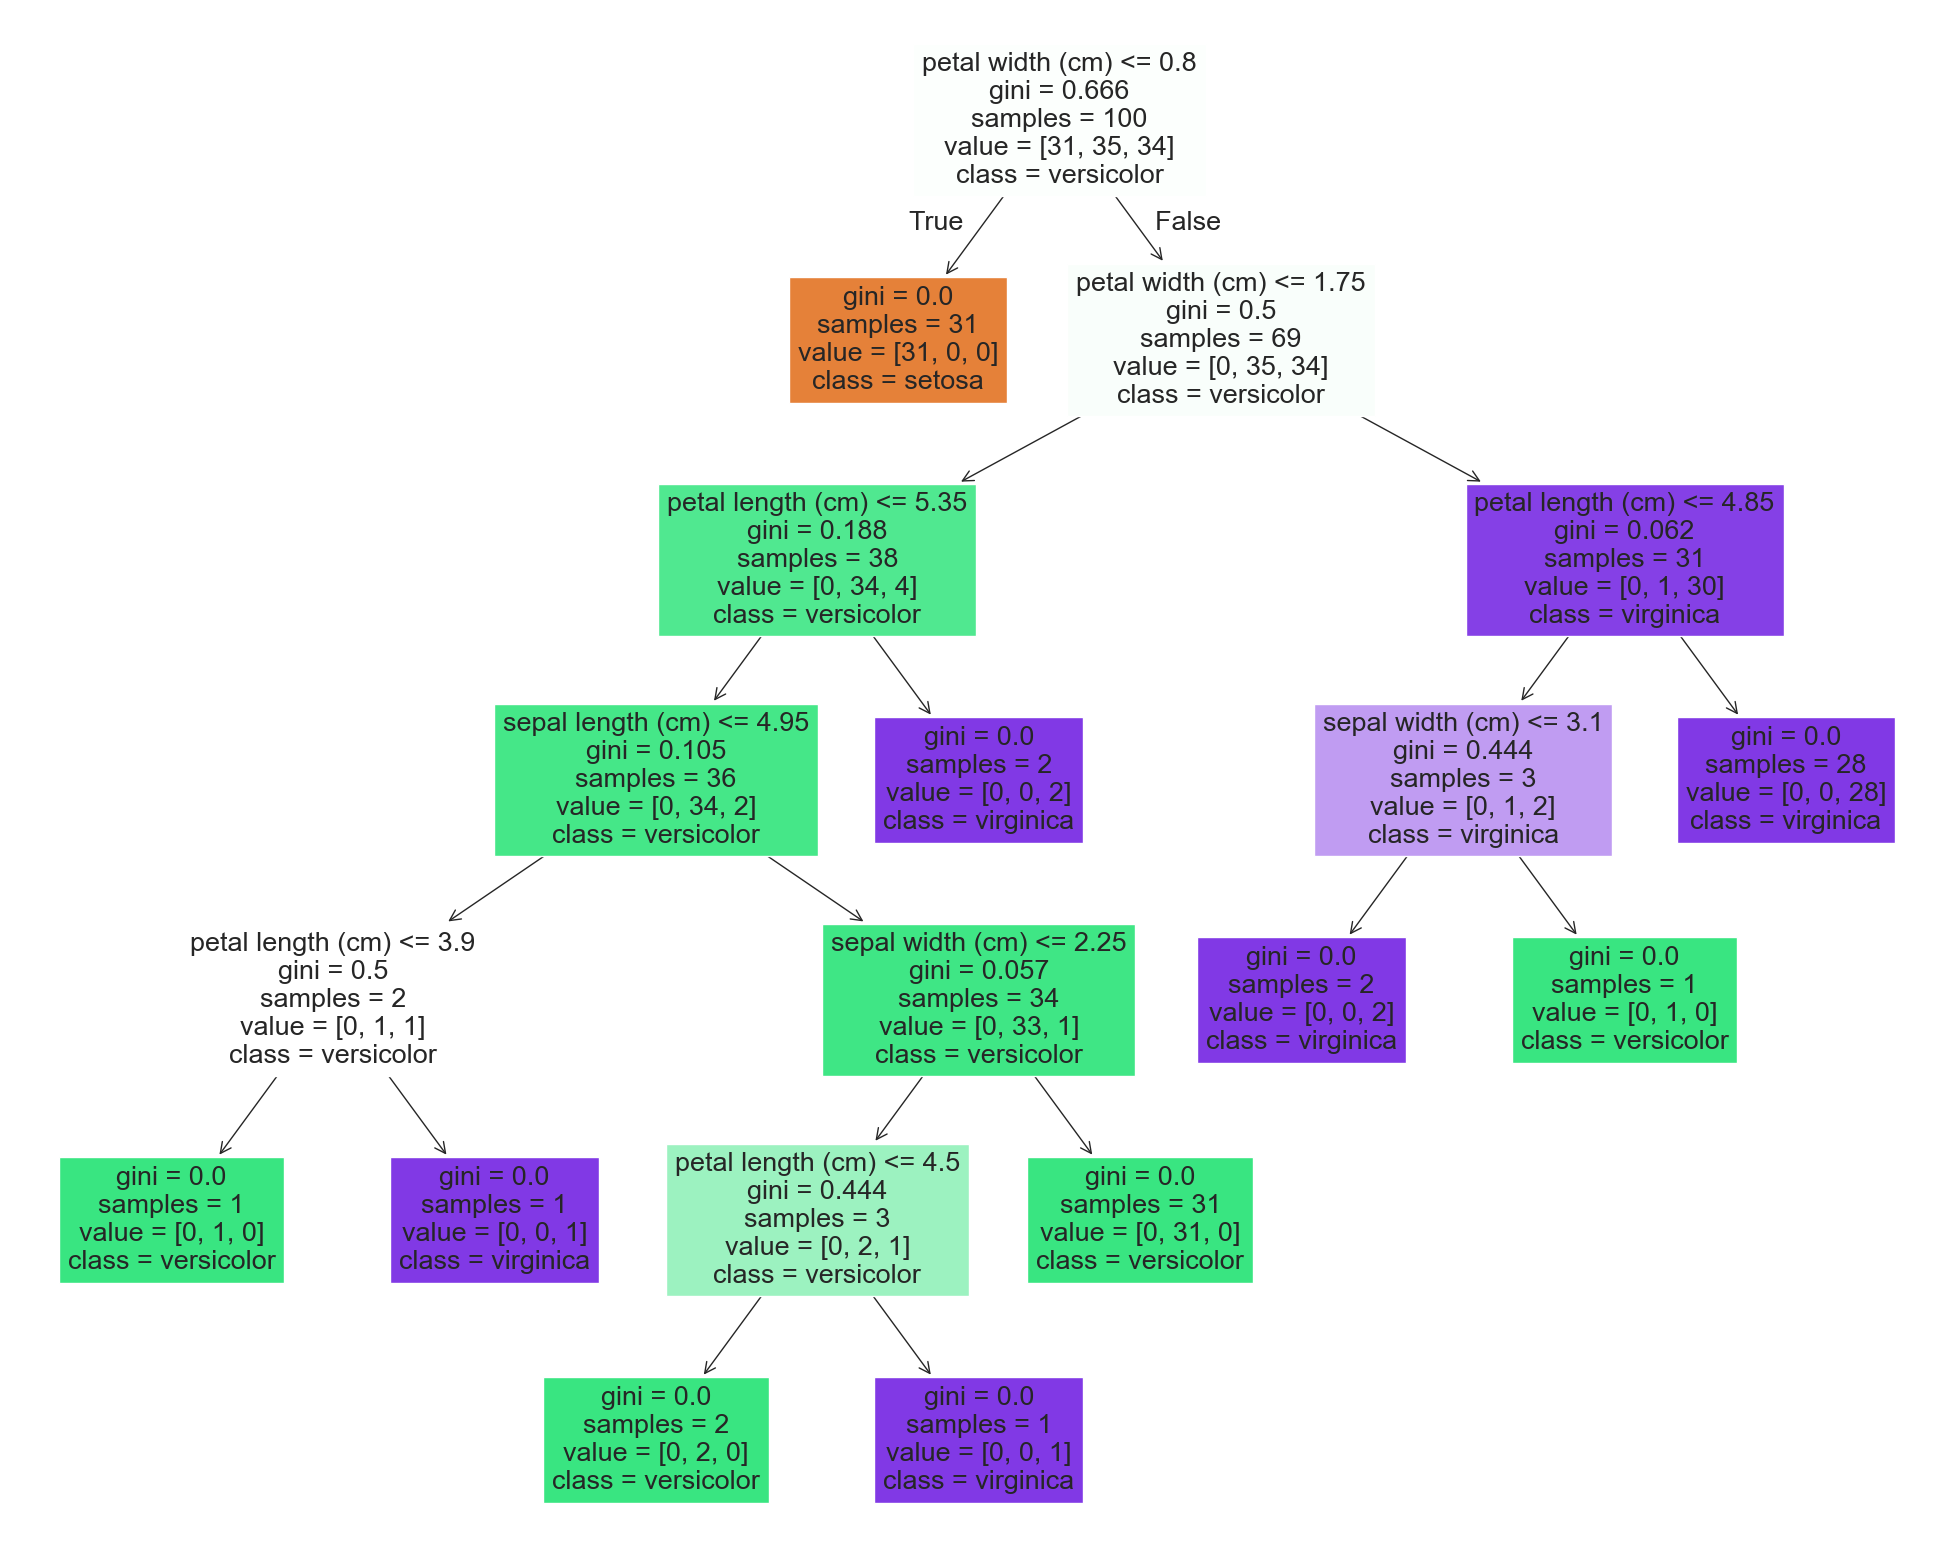

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

Finally, we can also graphically show the decision boundaries for the 3 classes. However, since we will visualize them in 2 dimensions, we'll need to re-train the algorithm with just 2 of the 4 available variables. For this example, we'll take the first 2, but feel free to try with any other combination!

(3.29, 8.890000000000004, 0.99, 5.390000000000004)

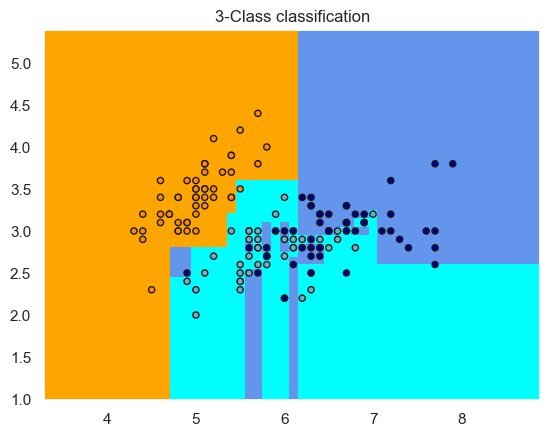

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris.data[:, :2]
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Train the model 
model.fit(xtrain[:, :2], ytrain) # to visualize in 2-dim, we can only take 2 variables
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')